In [34]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import math

import matplotlib.ticker as ticker
import seaborn as sns

from matplotlib import style
style.use('bmh')
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('axes', facecolor='#FFFFFF')

#%load_ext autoreload
#%autoreload 2
#from analysis_utils import bin, binned_scatterplot, label_bin

pd.set_option('display.max_columns', 100)  # or 1000

In [35]:
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
'axes.facecolor': 'None',
'axes.grid': False,
"font.size":14,
"axes.titlesize":14,
"axes.labelsize":14,
#'axes.labelcolor': 'dimgrey',
'axes.spines.right': False,
'axes.spines.top': False,
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
#'text.color': 'dimgrey',
'xtick.bottom': False,
'xtick.color': 'black',
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'black',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":14,
                                "axes.labelsize":14})


def binned_scatterplot(binned_df, agg_cols, ax, xticks, grid_locs, colors, 
                        xlabel=None, ylabel=None, title=None, legend_loc=None):

    if len(agg_cols) > 1:
        for i,c in enumerate(agg_cols):
            ax.errorbar(binned_df['midpoint'], binned_df[f'{c}_mean'], 
                        yerr=binned_df[f'{c}_ci'], 
                        label=c, capsize=7, markeredgewidth=4, c=colors[i], linewidth=5)
        ax.legend(loc=legend_loc, fontsize='small')
    else:
        ax.errorbar(binned_df['midpoint'], binned_df[f'{agg_cols[0]}_mean'], 
                    yerr=binned_df[f'{agg_cols[0]}_ci'], 
                    label=None, capsize=7, markeredgewidth=4, c=colors[0], linewidth=5)
    
    if xticks is not None:
        ax.set_xticks(grid_locs) # use grid_locs if don't want midpoints
        ax.set_xticklabels(grid_locs, rotation=90, fontsize='medium')
    ax.grid(False)
    for loc in grid_locs[:-1]:
        ax.axvline(loc, ls='--', lw=1, c='lightgrey')
    plt.yticks(fontsize='medium')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [36]:
cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

def bin_equal(array,bins):
    amin,amax = min(array),max(array)
    step = (amax-amin)/bins
    bins = [(i-amin)//step for i in array]
    mbin = max(bins)
    bin_partitions = [amin+step*i for i in range(int(mbin)+2)]
    return bins, bin_partitions

cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

cbsa_df = copy.deepcopy(cbsa_data[['GTCBSA', 'POP', 'LOG_POP', 'AVG_FAMILY_TIME', 'AVG_NHFAMILY_IX', 
            'AVG_FAMILY_IX','AVG_NHFAMILY_NONWORK_TIME', 'AVG_FRIEND_NONWORK_TIME', 
            'AVG_CCC_NONWORK_TIME', 'AVG_NHSOCIAL_TIME', 'AVG_NHFAMILY_SOCIAL_TIME_RATIO']])

bins,partitions = bin_equal(cbsa_df['LOG_POP'],6)
cbsa_df['bin'] = bins
cbsa_df['sum'] = cbsa_df['AVG_NHFAMILY_NONWORK_TIME'] + cbsa_df['AVG_FRIEND_NONWORK_TIME'] + cbsa_df['AVG_CCC_NONWORK_TIME']
cbsa_df = cbsa_df[['GTCBSA','bin', 'POP', 'LOG_POP']]
cbsa_df.head(3)

GTCBSA  bin     POP  LOG_POP
0  10180  0.0  170669     5.23
1  10420  2.0  703845     5.85
2  10580  2.0  880736     5.94

In [37]:
data_loc = '/Users/jericho/Documents/csi/csi-research/Data/atus/'

act_df = pd.DataFrame()
resp_df = pd.DataFrame()
who_df = pd.DataFrame()
ec_df = pd.DataFrame()
cps_df = pd.DataFrame()

for i in range(2016,2020):
    act_file = f'atusact_{i}/atusact_{i}.dat'
    resp_file = f'atusresp_{i}/atusresp_{i}.dat'
    who_file = f'atuswho_{i}/atuswho_{i}.dat'
    ec_file  = f'atusrostec_{i}/atusrostec_{i}.dat'
    cps_file = f'atuscps_{i}/atuscps_{i}.dat'

    temp_act_df = pd.read_csv(data_loc+act_file)
    temp_resp_df = pd.read_csv(data_loc+resp_file)
    temp_who_df = pd.read_csv(data_loc+who_file)
    temp_ec_df = pd.read_csv(data_loc+ec_file)
    temp_cps_df = pd.read_csv(data_loc+cps_file)

    act_df = pd.concat([act_df, temp_act_df])
    resp_df = pd.concat([resp_df, temp_resp_df])
    who_df = pd.concat([who_df, temp_who_df])
    ec_df = pd.concat([ec_df, temp_ec_df])
    cps_df = pd.concat([cps_df, temp_cps_df])

weights_df = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa_adjusted_weights_6_iter.csv')

cps_df = cps_df[['TUCASEID','GTCBSA']]
cps_df['GTCBSA'] = cps_df['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cps_df = cps_df[cps_df['GTCBSA']!='00000']
cps_df = cps_df.drop_duplicates()
cps_weights_df = cps_df.merge(weights_df, how='right',on='TUCASEID')
cps_weights_bins = cps_weights_df.merge(cbsa_df,how='left',on='GTCBSA')
cps_weights_bins = cps_weights_bins[~cps_weights_bins['GTCBSA'].isna()]

In [38]:
bin_weights = cps_weights_bins[['bin','NEW_WEIGHT']].groupby('bin').sum()
act_df_trunc = act_df #        [act_df['TUTIER1CODE']==4] # filter to Code 4      ################################
keep_cols = ['TUCASEID', 'TUACTIVITY_N','TEWHERE', 'TUACTDUR24','TUTIER1CODE','TUTIER2CODE','TUTIER3CODE','TRCODE']
act_df_trunc = act_df_trunc[keep_cols]

In [39]:
act_df_labeled = copy.deepcopy(act_df_trunc)
who_df_labeled = copy.deepcopy(who_df)

act_df_labeled['combined_label'] = act_df_labeled['TUCASEID'].astype(str) + '_' + act_df_labeled['TUACTIVITY_N'].astype(str)
who_df_labeled['combined_label'] = who_df_labeled['TUCASEID'].astype(str) + '_' + who_df_labeled['TUACTIVITY_N'].astype(str)
act_who = act_df_labeled.merge(who_df_labeled,how='left',on='combined_label')

act_who = act_who[['TUCASEID_x', 'TUACTIVITY_N_x', 'TEWHERE', 'TUACTDUR24', 'TUTIER1CODE',
       'TUTIER2CODE', 'TUTIER3CODE', 'TRCODE', 'TRWHONA', 'TULINENO', 
       'TUWHO_CODE']]

act_who.columns = ['TUCASEID', 'TUACTIVITY_N', 'TEWHERE', 'TUACTDUR24', 'TUTIER1CODE',
       'TUTIER2CODE', 'TUTIER3CODE', 'TRCODE', 'TRWHONA', 'TULINENO', 
       'TUWHO_CODE']

act_who_where = act_who.merge(cps_weights_bins,on='TUCASEID',how='left')
act_who_where = act_who_where[~act_who_where['bin'].isna()]

In [52]:
# IN EC Roster File
hh_teelwho = [20,21,22,23,24,25,26,27] # teelwho is for providing elder care
nh_teelwho = [33,34,35,36,37,38,39,40,41,42,47,48,49]

# IN Who File
# TUWHO_CODE is for who was with you
hhfam_accomp = [20,21,22,23,24,25,26,27] 
nhfam_accomp = [40,51,52,53]
friend_accomp = [54]
coworker_accomp = [59,60,61]
other_accomp = [56,58]

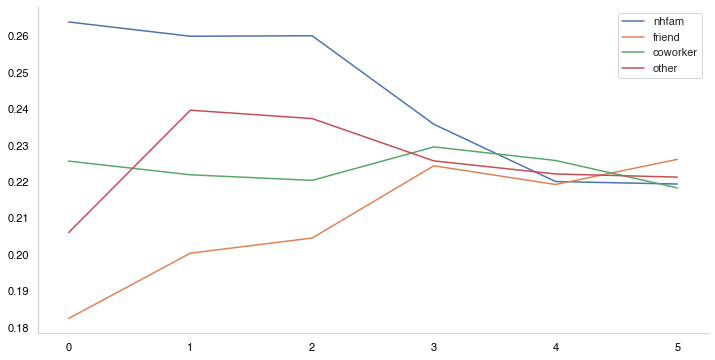

In [95]:
types = [hhfam_accomp, nhfam_accomp, friend_accomp, coworker_accomp, other_accomp]
names = ['hhfam', 'nhfam', 'friend', 'coworker', 'other']

plt.figure(figsize=(12,6))
for i in range(1, len(types)):
    #print(names[i])
    weights = act_who_where[['TUCASEID','NEW_WEIGHT','bin']].drop_duplicates().groupby('bin').sum()
    weights = weights[['NEW_WEIGHT']]
    act_who_where_nh = copy.deepcopy(act_who_where[act_who_where['TUWHO_CODE']>0])
    act_who_where_nh = act_who_where_nh[act_who_where_nh['TUWHO_CODE'].isin(types[i])]
    #display(weights)
    #print(act_who_where_nh.shape)
    #display(act_who_where_nh.head())
    resp_info = act_who_where_nh[['TUCASEID','NEW_WEIGHT','bin']]
    resp_info = resp_info.drop_duplicates()
    resp_data = act_who_where_nh[['TUCASEID','TUWHO_CODE']]
    resp_data = resp_data.drop_duplicates()
    resp_data = resp_data.groupby('TUCASEID').count()
    resp_data['respondent_count'] = 1
    resp_data = resp_data.reset_index()
    resp_data.columns = ['TUCASEID','TUWHO_CODE_COUNTS','RESP_COUNT']
    resp_data['TUWHO_CODE_COUNTS'] = 1

    resp_combined = resp_info.merge(resp_data,how='left',on='TUCASEID')
    #display(resp_combined.head())

    resp_combined['weighted_count'] = resp_combined['NEW_WEIGHT'] * resp_combined['TUWHO_CODE_COUNTS']
    bin_combined = resp_combined.groupby('bin').sum()

    bin_combined['NEW_WEIGHT'] = weights['NEW_WEIGHT']
    #display(bin_combined)
    bin_combined['actual_count'] = bin_combined['weighted_count'] / bin_combined['NEW_WEIGHT']
    bin_combined
    plt.plot(bin_combined.index.tolist(),bin_combined.actual_count.tolist(),label=names[i])
    #plt.ylim(0,3)

plt.legend()
#plt.yscale('log')

(0.0, 1.0)

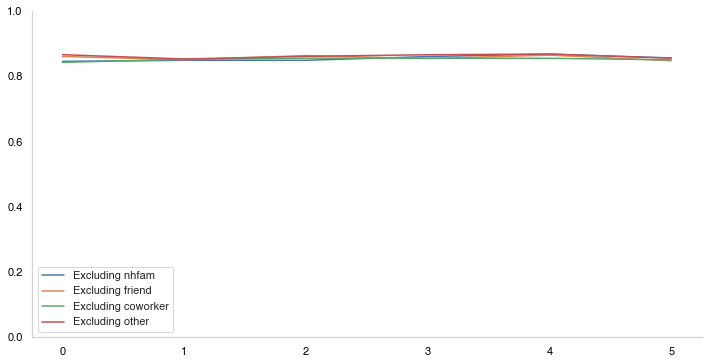

In [89]:
types = [hhfam_accomp, nhfam_accomp, friend_accomp, coworker_accomp, other_accomp]
names = ['hhfam', 'nhfam', 'friend', 'coworker', 'other']

plt.figure(figsize=(12,6))
for i in range(1, len(types)):
    #print(names[i])
    weights = act_who_where[['TUCASEID','NEW_WEIGHT','bin']].drop_duplicates().groupby('bin').sum()
    weights = weights[['NEW_WEIGHT']]
    act_who_where_nh = copy.deepcopy(act_who_where[act_who_where['TUWHO_CODE']>0])
    types_skipped = []
    for j in range(len(types)):
        if j != i:
            types_skipped += types[j]
    act_who_where_nh = act_who_where_nh[act_who_where_nh['TUWHO_CODE'].isin(types_skipped)]
    #display(weights)
    #print(act_who_where_nh.shape)
    #display(act_who_where_nh.head())
    resp_info = act_who_where_nh[['TUCASEID','NEW_WEIGHT','bin']]
    resp_info = resp_info.drop_duplicates()
    resp_data = act_who_where_nh[['TUCASEID','TUWHO_CODE']]
    resp_data = resp_data.drop_duplicates()
    resp_data = resp_data.groupby('TUCASEID').count()
    resp_data['respondent_count'] = 1
    resp_data = resp_data.reset_index()
    resp_data.columns = ['TUCASEID','TUWHO_CODE_COUNTS','RESP_COUNT']
    resp_data['TUWHO_CODE_COUNTS'] = 1

    resp_combined = resp_info.merge(resp_data,how='left',on='TUCASEID')
    #display(resp_combined.head())

    resp_combined['weighted_count'] = resp_combined['NEW_WEIGHT'] * resp_combined['TUWHO_CODE_COUNTS']
    bin_combined = resp_combined.groupby('bin').sum()

    bin_combined['NEW_WEIGHT'] = weights['NEW_WEIGHT']
    #display(bin_combined)
    bin_combined['actual_count'] = bin_combined['weighted_count'] / bin_combined['NEW_WEIGHT']
    bin_combined
    plt.plot(bin_combined.index.tolist(),bin_combined.actual_count.tolist(),label='Excluding '+names[i])
    #plt.ylim(0,3)

plt.legend()
plt.ylim(0,1)
#plt.yscale('log')

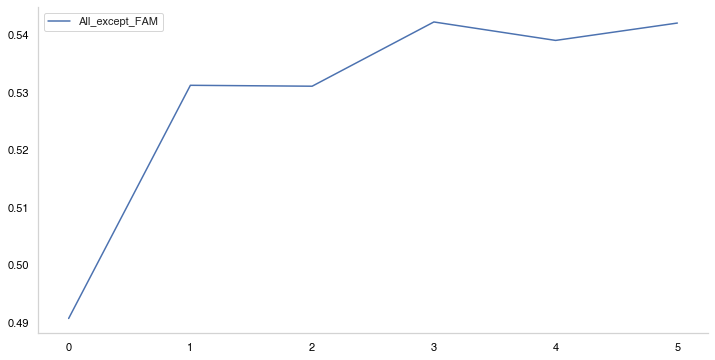

In [96]:
types = [hhfam_accomp, nhfam_accomp, friend_accomp, coworker_accomp, other_accomp]
names = ['hhfam', 'nhfam', 'friend', 'coworker', 'other']

plt.figure(figsize=(12,6))

comb_types = []
for i in range(2, len(types)):
    comb_types += types[i]

weights = act_who_where[['TUCASEID','NEW_WEIGHT','bin']].drop_duplicates().groupby('bin').sum()
weights = weights[['NEW_WEIGHT']]
act_who_where_nh = copy.deepcopy(act_who_where[act_who_where['TUWHO_CODE']>0])
act_who_where_nh = act_who_where_nh[act_who_where_nh['TUWHO_CODE'].isin(comb_types)]
resp_info = act_who_where_nh[['TUCASEID','NEW_WEIGHT','bin']]
resp_info = resp_info.drop_duplicates()
resp_data = act_who_where_nh[['TUCASEID','TUWHO_CODE']]
resp_data = resp_data.drop_duplicates()
resp_data = resp_data.groupby('TUCASEID').count()
resp_data['respondent_count'] = 1
resp_data = resp_data.reset_index()
resp_data.columns = ['TUCASEID','TUWHO_CODE_COUNTS','RESP_COUNT']
resp_data['TUWHO_CODE_COUNTS'] = 1

resp_combined = resp_info.merge(resp_data,how='left',on='TUCASEID')

resp_combined['weighted_count'] = resp_combined['NEW_WEIGHT'] * resp_combined['TUWHO_CODE_COUNTS']
bin_combined = resp_combined.groupby('bin').sum()

bin_combined['NEW_WEIGHT'] = weights['NEW_WEIGHT']
bin_combined['actual_count'] = bin_combined['weighted_count'] / bin_combined['NEW_WEIGHT']
bin_combined
plt.plot(bin_combined.index.tolist(),bin_combined.actual_count.tolist(),label='All_except_FAM')

plt.legend()
#plt.yscale('log')
#plt.ylim(0,1)